In [16]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.lines import Line2D
import seaborn as sns

In [5]:
PATH = "../Datasets/"
pd.set_option("display.max_columns", None)
sns.set_style("darkgrid")

In [7]:
df = pd.read_csv(PATH + "CompleteDataset.csv")
df["Fecha"] = pd.to_datetime(df["Fecha"])

In [8]:
def co(x):
    if x >= 0.04 and x <= 25: return x
    return np.nan

def pm25(x):
    if x >= 4: return x
    return np.nan

def o3(x):
    if x >= 0.03 and x <= 500: return x
    return np.nan

def so2(x):
    if x >= 0.5 and x <= 1000: return x
    return np.nan

def no2(x):
    if x >= 0.04 and x <= 3000: return x
    return np.nan

def no(x):
    if x >= 0.04 and x <= 5000: return x
    return np.nan

In [9]:
variables = ["CO", "PM2.5", "O3", "SO2", "NO2", "NO"]
functions = [co, pm25, o3, so2, no2, no]

In [10]:
for i, v in enumerate(variables):
    df[v] = df[v].apply(functions[i])

In [11]:
df["WindDirectionRad"] = np.radians(df["WindDirection"])

In [12]:
def season(date):
    year = date.year
    seasons = {
        'Winter': (pd.Timestamp(f'{year}-12-21'), pd.Timestamp(f'{year+1}-03-19')),
        'Spring': (pd.Timestamp(f'{year}-03-20'), pd.Timestamp(f'{year}-06-20')),
        'Summer': (pd.Timestamp(f'{year}-06-21'), pd.Timestamp(f'{year}-09-22')),
        'Fall':   (pd.Timestamp(f'{year}-09-23'), pd.Timestamp(f'{year}-12-20'))
    }

    for season, (start, end) in seasons.items():
        if start <= date <= end:
            return season
    return 'Winter'  # Casos entre diciembre y marzo del siguiente año

In [13]:
df["Season"] = df["Fecha"].apply(season)

In [15]:
season_colors = {
    'Winter': 'royalblue',
    'Spring': 'forestgreen',
    'Summer': 'deeppink',
    'Fall': 'peru'
}

colors = df['Season'].map(season_colors)

In [17]:
dfSpring = df[df["Season"] == "Spring"]
dfSummer = df[df["Season"] == "Summer"]
dfFall = df[df["Season"] == "Fall"]
dfWinter = df[df["Season"] == "Winter"]

In [18]:
seasons_data = {
    "Winter": {"df": dfWinter, "color": "royalblue"},
    "Spring": {"df": dfSpring, "color": "forestgreen"},
    "Summer": {"df": dfSummer, "color": "deeppink"},
    "Fall":   {"df": dfFall, "color": "peru"}
}

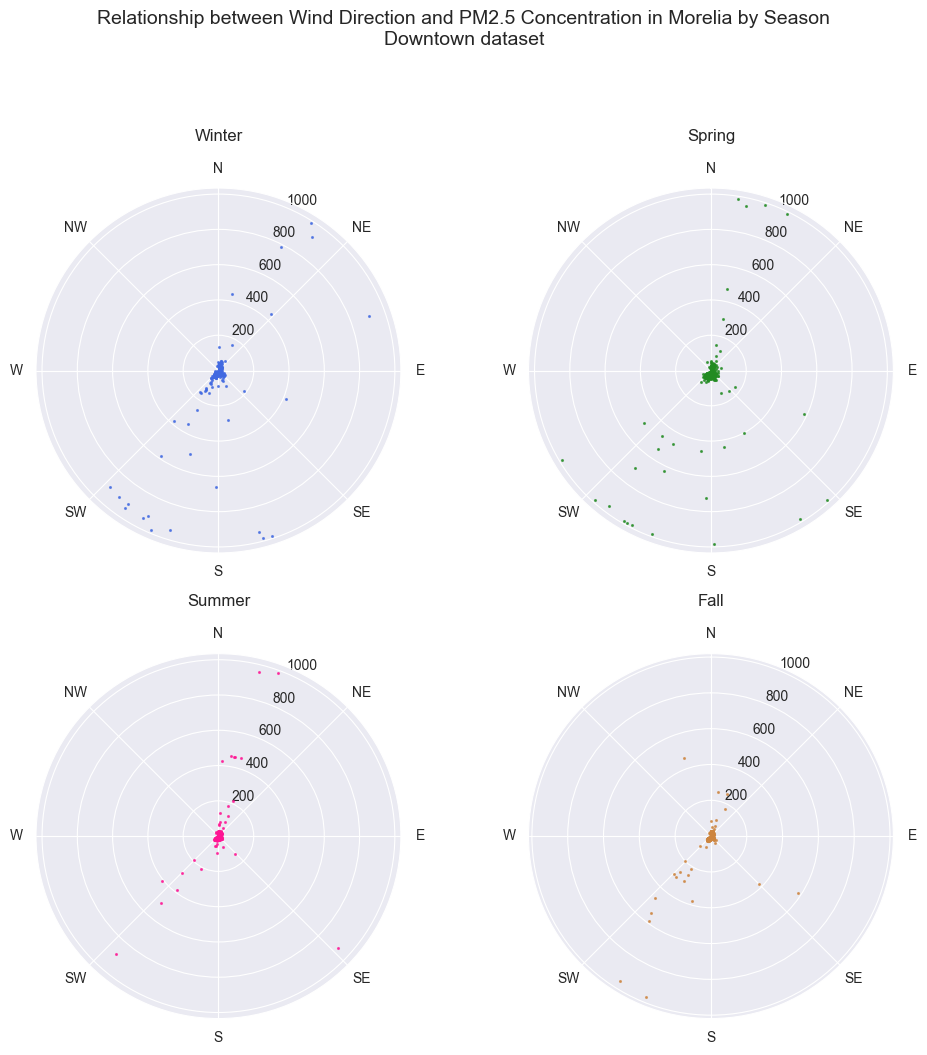

In [21]:
fig, axes = plt.subplots(2, 2, subplot_kw={'projection': 'polar'}, figsize=(10, 10))
fig.suptitle("Relationship between Wind Direction and PM2.5 Concentration in Morelia by Season\nDowntown dataset", fontsize=14, y=1.05)

for ax, (season, data) in zip(axes.flat, seasons_data.items()):
    dfx = data["df"]
    color = data["color"]

    ax.scatter(dfx["WindDirectionRad"], dfx["PM2.5"], s=1.5, color=color, alpha=0.7)
    ax.set_theta_zero_location('N')  
    ax.set_theta_direction(-1)  
    # ax.set_ylim(0, 100)
    ax.set_title(f"{season}", pad=15, fontsize=12)
    
    ax.set_xticks(np.radians([0, 45, 90, 135, 180, 225, 270, 315]))
    ax.set_xticklabels(['N', 'NE', 'E', 'SE', 'S', 'SW', 'W', 'NW'])

plt.tight_layout()
plt.show()

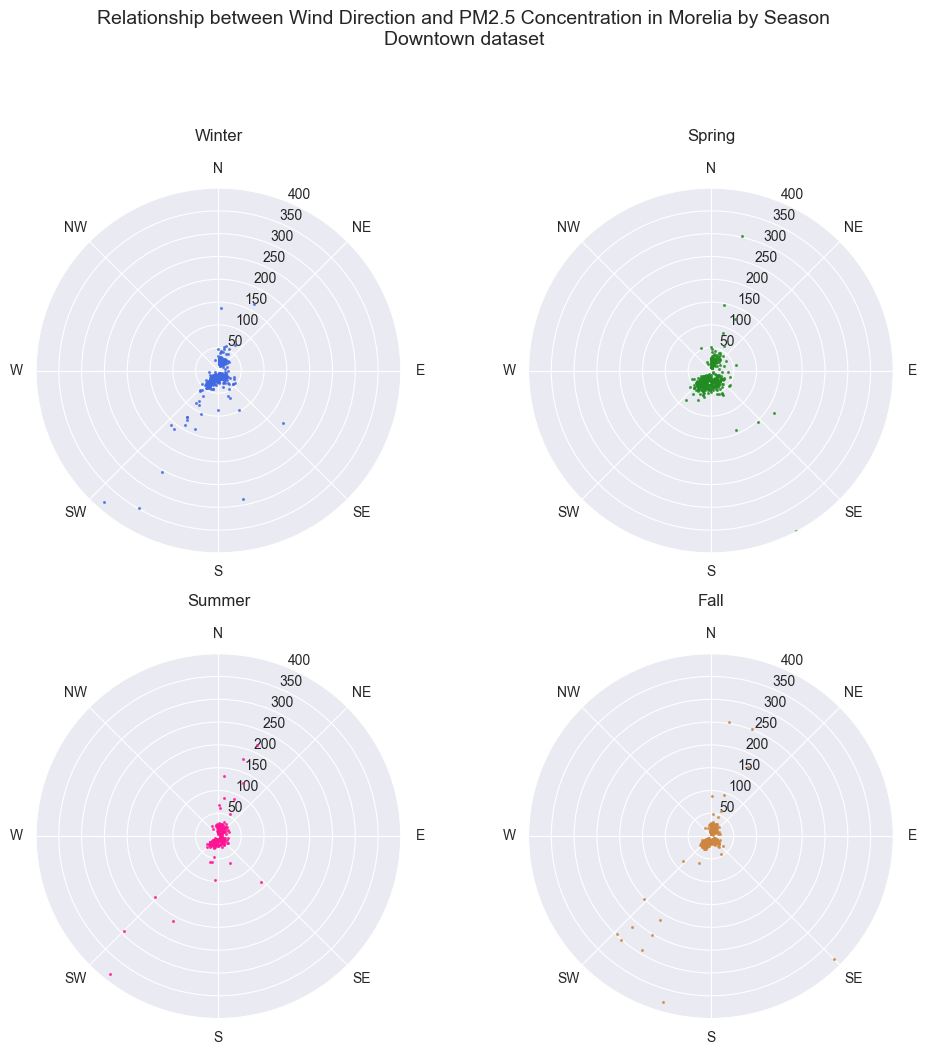

In [22]:
fig, axes = plt.subplots(2, 2, subplot_kw={'projection': 'polar'}, figsize=(10, 10))
fig.suptitle("Relationship between Wind Direction and PM2.5 Concentration in Morelia by Season\nDowntown dataset", fontsize=14, y=1.05)

for ax, (season, data) in zip(axes.flat, seasons_data.items()):
    dfx = data["df"]
    color = data["color"]

    ax.scatter(dfx["WindDirectionRad"], dfx["PM2.5"], s=1.5, color=color, alpha=0.7)
    ax.set_theta_zero_location('N')  
    ax.set_theta_direction(-1)  
    ax.set_ylim(0, 400)
    ax.set_title(f"{season}", pad=15, fontsize=12)
    
    ax.set_xticks(np.radians([0, 45, 90, 135, 180, 225, 270, 315]))
    ax.set_xticklabels(['N', 'NE', 'E', 'SE', 'S', 'SW', 'W', 'NW'])

plt.tight_layout()
plt.show()

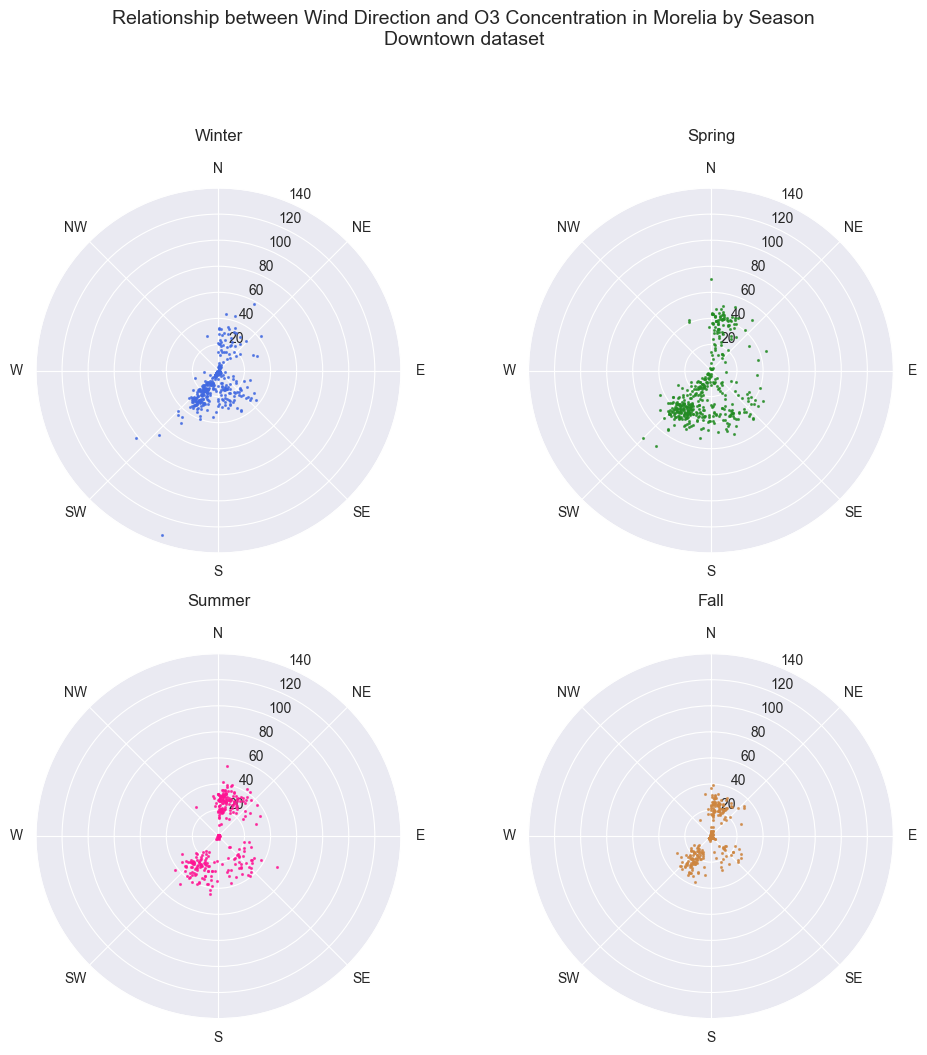

In [23]:
fig, axes = plt.subplots(2, 2, subplot_kw={'projection': 'polar'}, figsize=(10, 10))
fig.suptitle("Relationship between Wind Direction and O3 Concentration in Morelia by Season\nDowntown dataset", fontsize=14, y=1.05)

for ax, (season, data) in zip(axes.flat, seasons_data.items()):
    dfx = data["df"]
    color = data["color"]

    ax.scatter(dfx["WindDirectionRad"], dfx["O3"], s=1.5, color=color, alpha=0.7)
    ax.set_theta_zero_location('N')  
    ax.set_theta_direction(-1)  
    ax.set_ylim(0, 140)
    ax.set_title(f"{season}", pad=15, fontsize=12)
    
    ax.set_xticks(np.radians([0, 45, 90, 135, 180, 225, 270, 315]))
    ax.set_xticklabels(['N', 'NE', 'E', 'SE', 'S', 'SW', 'W', 'NW'])

plt.tight_layout()
plt.show()

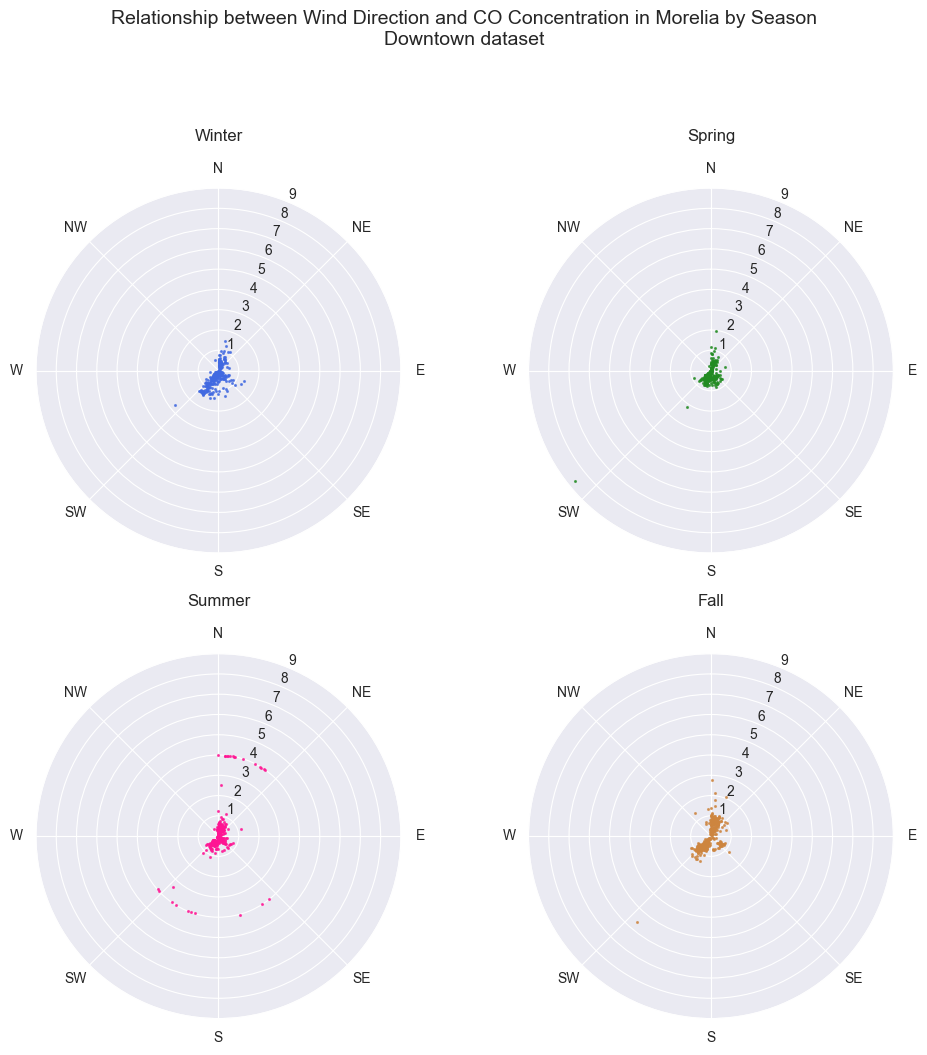

In [25]:
fig, axes = plt.subplots(2, 2, subplot_kw={'projection': 'polar'}, figsize=(10, 10))
fig.suptitle("Relationship between Wind Direction and CO Concentration in Morelia by Season\nDowntown dataset", fontsize=14, y=1.05)

for ax, (season, data) in zip(axes.flat, seasons_data.items()):
    dfx = data["df"]
    color = data["color"]

    ax.scatter(dfx["WindDirectionRad"], dfx["CO"], s=1.5, color=color, alpha=0.7)
    ax.set_theta_zero_location('N')  
    ax.set_theta_direction(-1)  
    ax.set_ylim(0, 9)
    ax.set_title(f"{season}", pad=15, fontsize=12)
    
    ax.set_xticks(np.radians([0, 45, 90, 135, 180, 225, 270, 315]))
    ax.set_xticklabels(['N', 'NE', 'E', 'SE', 'S', 'SW', 'W', 'NW'])

plt.tight_layout()
plt.show()

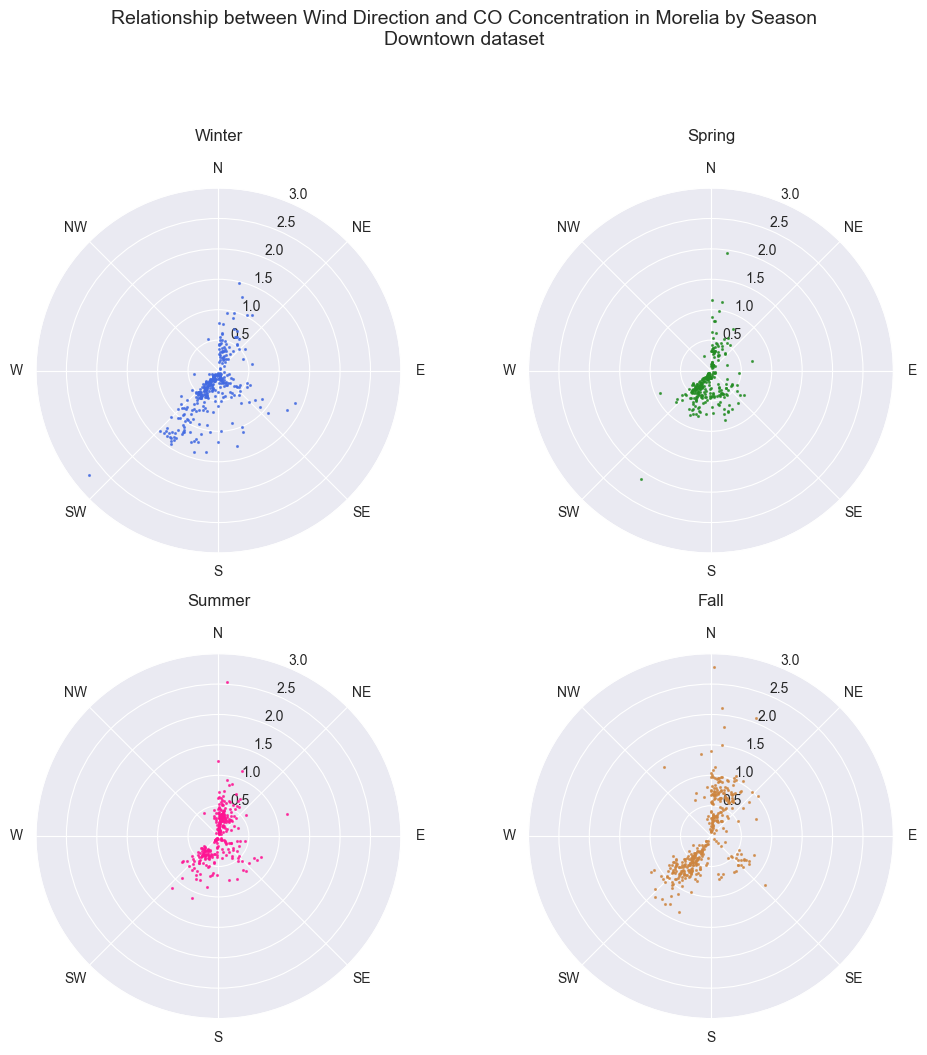

In [26]:
fig, axes = plt.subplots(2, 2, subplot_kw={'projection': 'polar'}, figsize=(10, 10))
fig.suptitle("Relationship between Wind Direction and CO Concentration in Morelia by Season\nDowntown dataset", fontsize=14, y=1.05)

for ax, (season, data) in zip(axes.flat, seasons_data.items()):
    dfx = data["df"]
    color = data["color"]

    ax.scatter(dfx["WindDirectionRad"], dfx["CO"], s=1.5, color=color, alpha=0.7)
    ax.set_theta_zero_location('N')  
    ax.set_theta_direction(-1)  
    ax.set_ylim(0, 3)
    ax.set_title(f"{season}", pad=15, fontsize=12)
    
    ax.set_xticks(np.radians([0, 45, 90, 135, 180, 225, 270, 315]))
    ax.set_xticklabels(['N', 'NE', 'E', 'SE', 'S', 'SW', 'W', 'NW'])

plt.tight_layout()
plt.show()

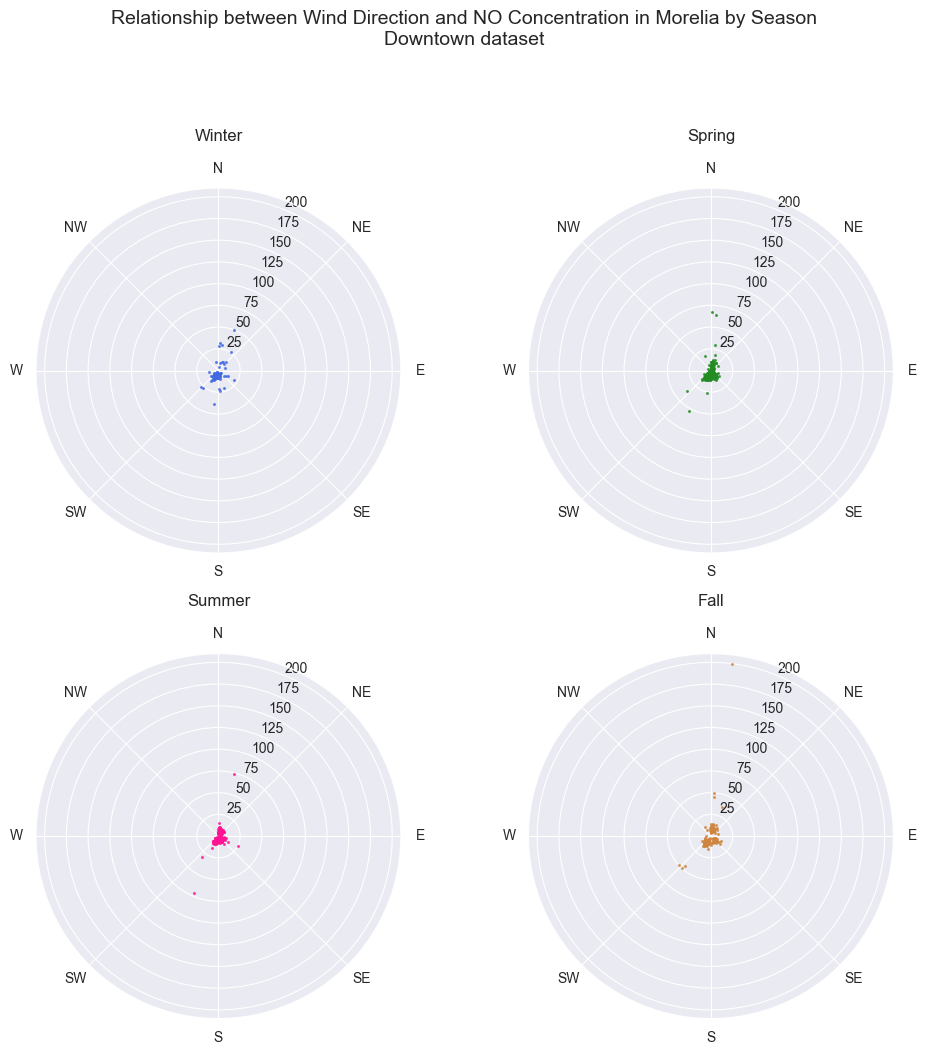

In [28]:
fig, axes = plt.subplots(2, 2, subplot_kw={'projection': 'polar'}, figsize=(10, 10))
fig.suptitle("Relationship between Wind Direction and NO Concentration in Morelia by Season\nDowntown dataset", fontsize=14, y=1.05)

for ax, (season, data) in zip(axes.flat, seasons_data.items()):
    dfx = data["df"]
    color = data["color"]

    ax.scatter(dfx["WindDirectionRad"], dfx["NO"], s=1.5, color=color, alpha=0.7)
    ax.set_theta_zero_location('N')  
    ax.set_theta_direction(-1)  
    ax.set_ylim(0, 210)
    ax.set_title(f"{season}", pad=15, fontsize=12)
    
    ax.set_xticks(np.radians([0, 45, 90, 135, 180, 225, 270, 315]))
    ax.set_xticklabels(['N', 'NE', 'E', 'SE', 'S', 'SW', 'W', 'NW'])

plt.tight_layout()
plt.show()

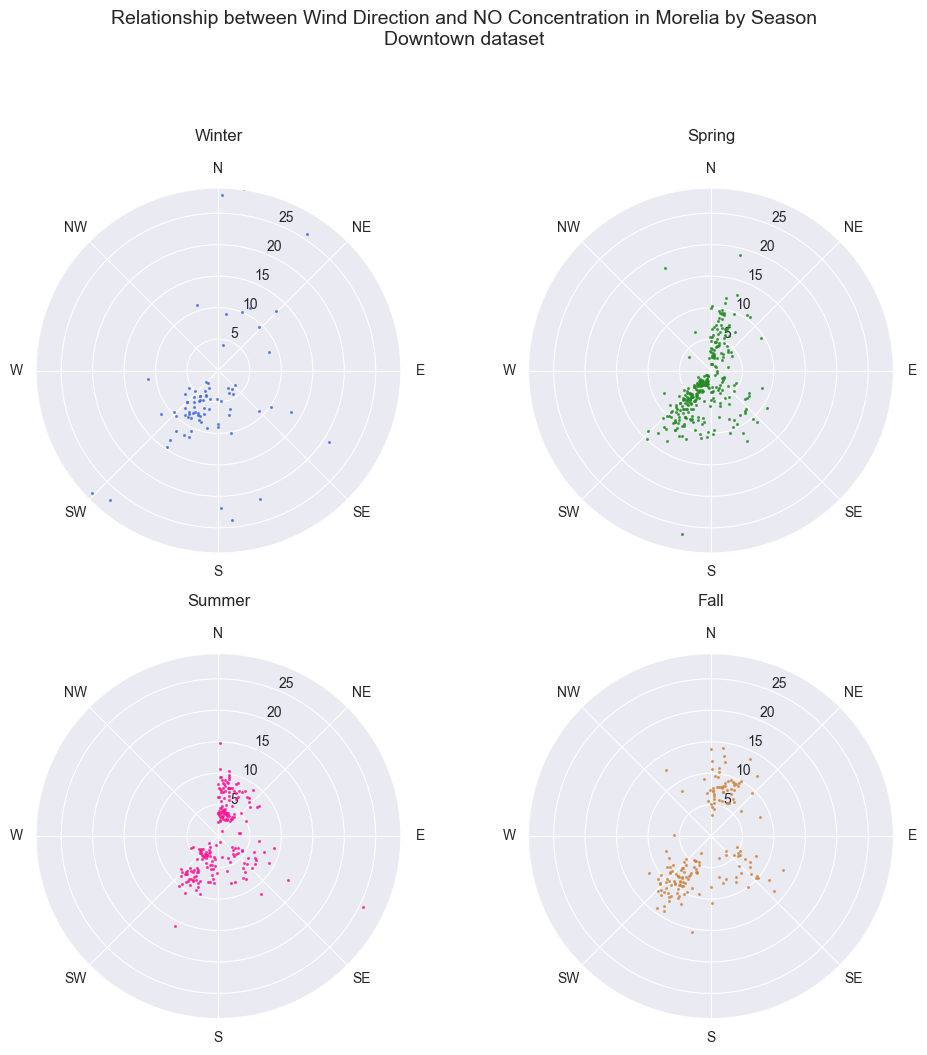

In [29]:
fig, axes = plt.subplots(2, 2, subplot_kw={'projection': 'polar'}, figsize=(10, 10))
fig.suptitle("Relationship between Wind Direction and NO Concentration in Morelia by Season\nDowntown dataset", fontsize=14, y=1.05)

for ax, (season, data) in zip(axes.flat, seasons_data.items()):
    dfx = data["df"]
    color = data["color"]

    ax.scatter(dfx["WindDirectionRad"], dfx["NO"], s=1.5, color=color, alpha=0.7)
    ax.set_theta_zero_location('N')  
    ax.set_theta_direction(-1)  
    ax.set_ylim(0, 29)
    ax.set_title(f"{season}", pad=15, fontsize=12)
    
    ax.set_xticks(np.radians([0, 45, 90, 135, 180, 225, 270, 315]))
    ax.set_xticklabels(['N', 'NE', 'E', 'SE', 'S', 'SW', 'W', 'NW'])

plt.tight_layout()
plt.show()

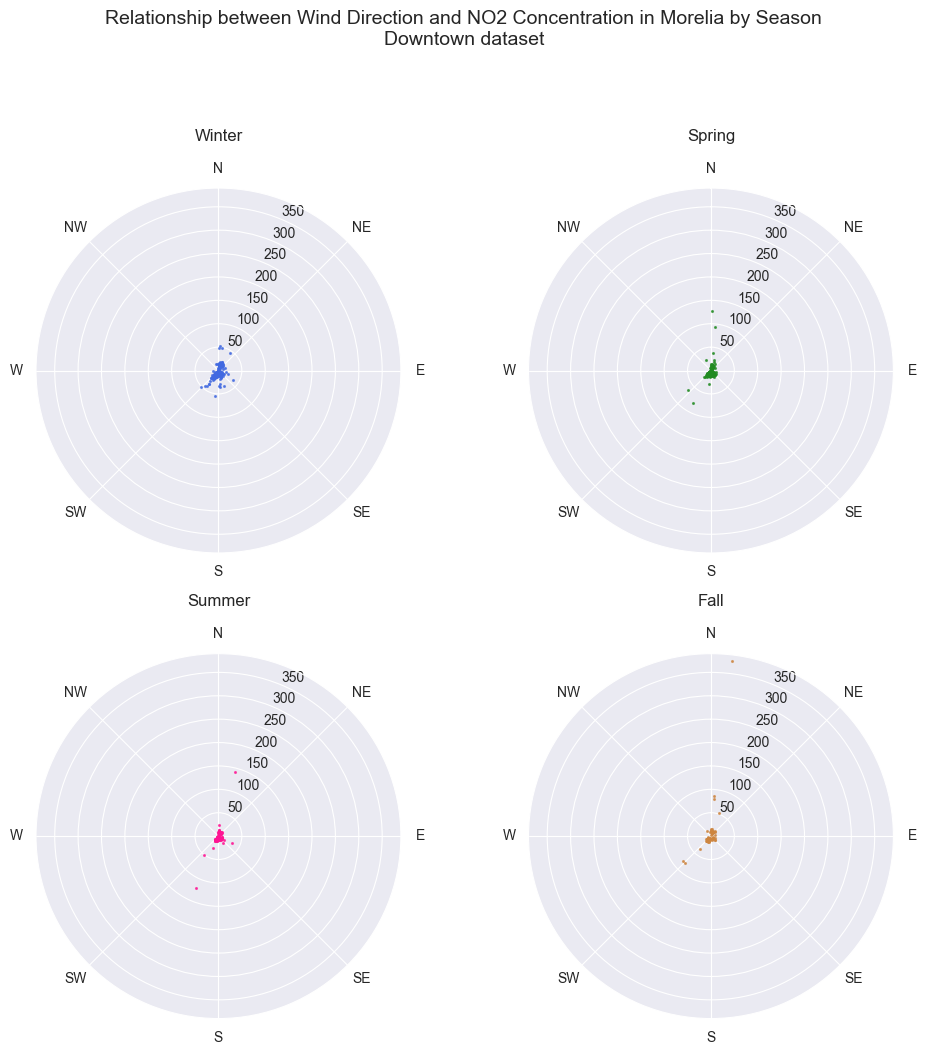

In [30]:
fig, axes = plt.subplots(2, 2, subplot_kw={'projection': 'polar'}, figsize=(10, 10))
fig.suptitle("Relationship between Wind Direction and NO2 Concentration in Morelia by Season\nDowntown dataset", fontsize=14, y=1.05)

for ax, (season, data) in zip(axes.flat, seasons_data.items()):
    dfx = data["df"]
    color = data["color"]

    ax.scatter(dfx["WindDirectionRad"], dfx["NO2"], s=1.5, color=color, alpha=0.7)
    ax.set_theta_zero_location('N')  
    ax.set_theta_direction(-1)  
    ax.set_ylim(0, 390)
    ax.set_title(f"{season}", pad=15, fontsize=12)
    
    ax.set_xticks(np.radians([0, 45, 90, 135, 180, 225, 270, 315]))
    ax.set_xticklabels(['N', 'NE', 'E', 'SE', 'S', 'SW', 'W', 'NW'])

plt.tight_layout()
plt.show()

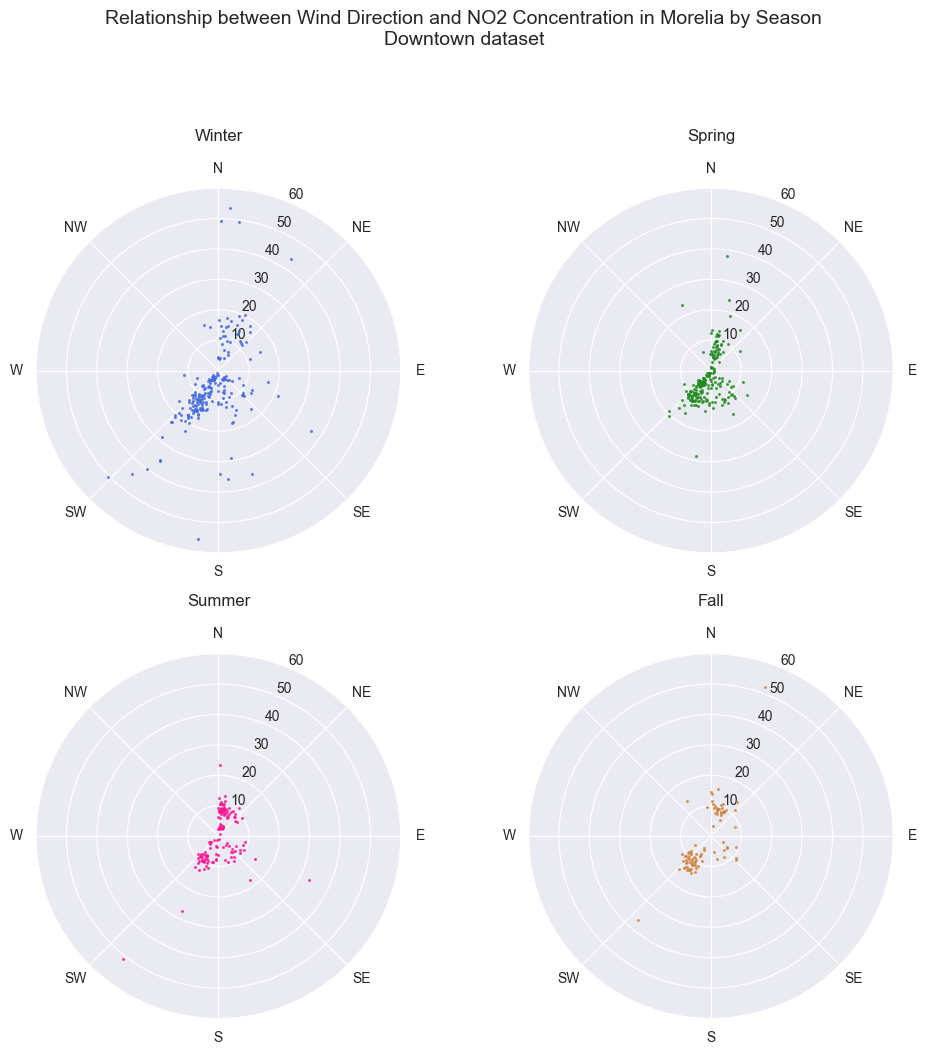

In [32]:
fig, axes = plt.subplots(2, 2, subplot_kw={'projection': 'polar'}, figsize=(10, 10))
fig.suptitle("Relationship between Wind Direction and NO2 Concentration in Morelia by Season\nDowntown dataset", fontsize=14, y=1.05)

for ax, (season, data) in zip(axes.flat, seasons_data.items()):
    dfx = data["df"]
    color = data["color"]

    ax.scatter(dfx["WindDirectionRad"], dfx["NO2"], s=1.5, color=color, alpha=0.7)
    ax.set_theta_zero_location('N')  
    ax.set_theta_direction(-1)  
    ax.set_ylim(0, 60)
    ax.set_title(f"{season}", pad=15, fontsize=12)
    
    ax.set_xticks(np.radians([0, 45, 90, 135, 180, 225, 270, 315]))
    ax.set_xticklabels(['N', 'NE', 'E', 'SE', 'S', 'SW', 'W', 'NW'])

plt.tight_layout()
plt.show()

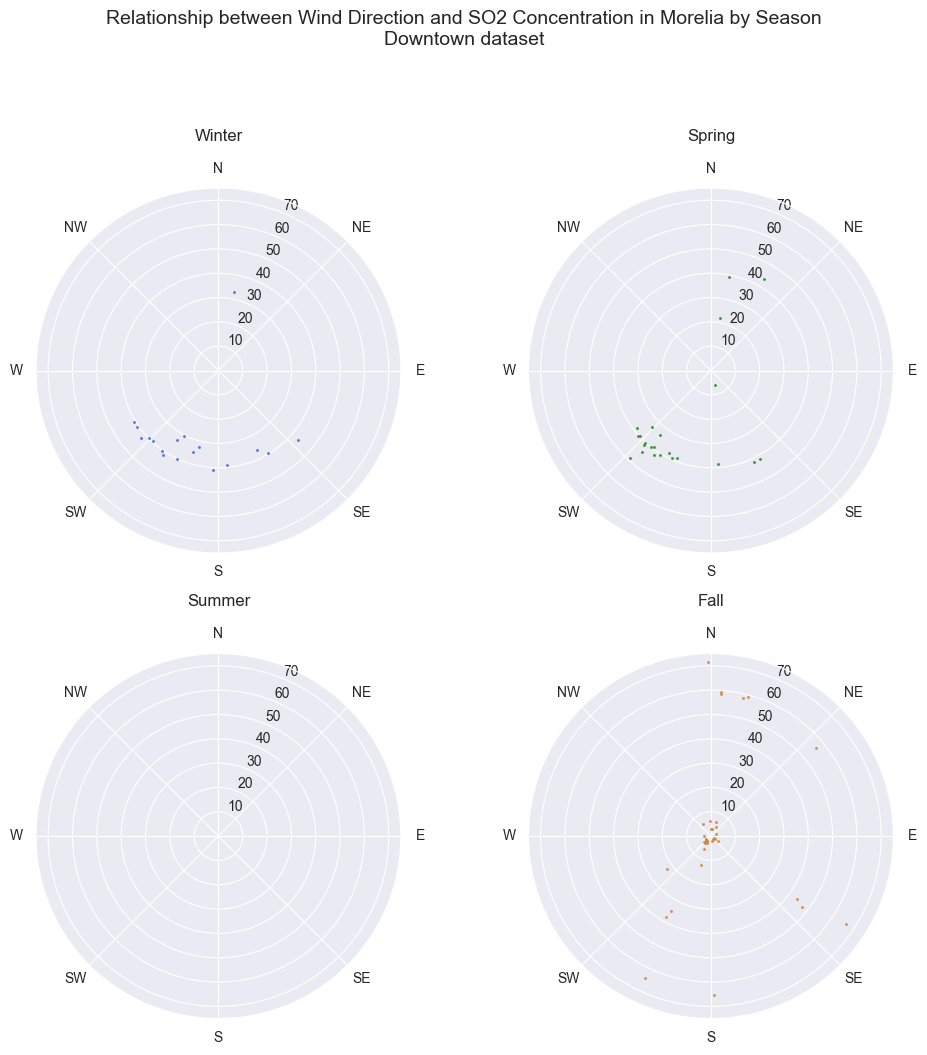

In [33]:
fig, axes = plt.subplots(2, 2, subplot_kw={'projection': 'polar'}, figsize=(10, 10))
fig.suptitle("Relationship between Wind Direction and SO2 Concentration in Morelia by Season\nDowntown dataset", fontsize=14, y=1.05)

for ax, (season, data) in zip(axes.flat, seasons_data.items()):
    dfx = data["df"]
    color = data["color"]

    ax.scatter(dfx["WindDirectionRad"], dfx["SO2"], s=1.5, color=color, alpha=0.7)
    ax.set_theta_zero_location('N')  
    ax.set_theta_direction(-1)  
    ax.set_ylim(0, 75)
    ax.set_title(f"{season}", pad=15, fontsize=12)
    
    ax.set_xticks(np.radians([0, 45, 90, 135, 180, 225, 270, 315]))
    ax.set_xticklabels(['N', 'NE', 'E', 'SE', 'S', 'SW', 'W', 'NW'])

plt.tight_layout()
plt.show()